In [1]:
%matplotlib inline

import gensim
import json
import logging
import math
import os
import random
import re
import spacy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyLDAvis.gensim_models
import warnings

from gensim import corpora, models
from gensim.utils import simple_preprocess
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
from gensim.test.utils import datapath

from nltk.corpus import stopwords
from nltk import pos_tag, ne_chunk
from nltk.tokenize import word_tokenize
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
from nltk.collocations import TrigramCollocationFinder
from nltk.metrics import TrigramAssocMeasures
from nltk.tokenize import RegexpTokenizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.preprocessing import normalize

from stop_words import get_stop_words
from wordcloud import WordCloud

C:\Users\brune\anaconda3\envs\CoursHN\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
with open(os.path.join('posts_maior_propre.json'), 'r', encoding = 'UTF-8') as fin_M2 :
    data = json.load(fin_M2)

In [3]:
index = ''
a = ''
list_clean_content = []

for j in range(len(data)) :
    index = data[j]
    a = index.replace( "\n", "")
    list_clean_content.append(a)

In [4]:
sp_stop_words = get_stop_words('spanish')
fr_stop_words = get_stop_words('french')
en_stop_words = get_stop_words('english')

In [28]:
words = [ 'plus', 'rien', 'tres', 'ca', 'fr', 'com', 'www', 'http',
          'etais', 'etait', 'etaient', 'meme', 'non', 'bien', 'oui', 'quoi',
          'chez', 'va', 'apres', "c'est", "c", "toute",  ]

In [6]:
stop_words = sp_stop_words + fr_stop_words + en_stop_words + words 

In [26]:
# tiré de : http://ramiro.org/notebook/sherlock-holmes-canon-wordcloud/

from wordcloud import WordCloud

from imageio import imread

# nombre de mots à afficher
limit = 100

#fontcolor='#fafafa'
fontcolor='#fa0000' # couleur des caractères
bgcolor = '#000000' # couleur de fond
#bgcolor = '#ffffff'
#bgcolor = '#aa0000'
    
wordcloud = WordCloud(
    max_words=limit,
    stopwords= stop_words, # liste de mots-outils
#    mask=imread('img/mask.png'),  # avec ou sans masque, à essayer ! (attention, nécessite un fichier de masque en noir et blanc)
   # mask=imread('img/crown.png'),  # avec ou sans masque, à essayer ! (attention, nécessite un fichier de masque en noir et blanc)    
    background_color=bgcolor,
#    font_path=font   # si on veut changer la police de caractères
).generate(str(list_clean_content)) # tolower() permet de mettre tout le texte en minuscule

C:\Users\brune\anaconda3\envs\CoursHN\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\brune\anaconda3\envs\CoursHN\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\brune\anaconda3\envs\CoursHN\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\brune\anaconda3\envs\CoursHN\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength inst

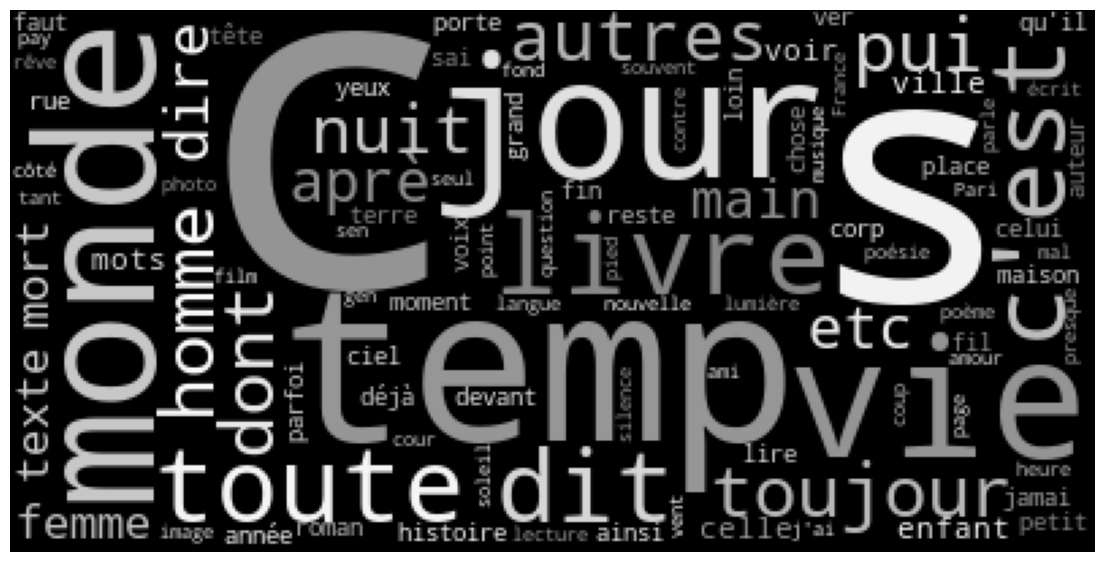

In [27]:
# cette première ligne est nécessaire pour afficher des graphiques dans le notebook
%matplotlib inline

import random
import matplotlib.pyplot as plt

fig = plt.figure()

# taille de la figure
fig.set_figwidth(14)
fig.set_figheight(18)

# si on souhaite mettre un titre
title = "Essai"

# cette fonction optionnelle permet de "customiser" l'affichage, cf. ci-dessous
#def grey_color(word, font_size, position, orientation, random_state=None, **kwargs):
    #return 'hsl(0, 0%%, %d%%)' % random.randint(50, 100)

#plt.imshow(wordcloud)     # le plus simple
plt.imshow(wordcloud.recolor(color_func=grey_color, random_state=3))  # si on veut "customiser"
#plt.title(title, color=fontcolor, size=30, y=1.01)     # si on veut rajouter un titre
plt.axis('off')
plt.show()